# Zerobase EDA 2일차
## 서울시 범죄 현황 분석

### 한글 깨짐 방지

Text(0.5, 1.0, '데이터 사이언스')

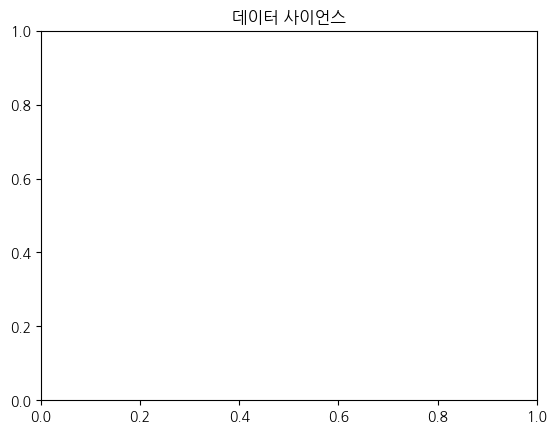

In [2]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('데이터 사이언스')

## 데이터 출처 - 공공데이터포털
2022년 서울특별시 관서별 5대범죄 발생 검거 현황 데이터 - https://www.data.go.kr/data/15054738/fileData.do

## 데이터 읽기

In [3]:
# thousands 속성으로 문자열형의 천단위 구분의 콤마를 제거하고 숫자형으로 읽어들임
import pandas as pd
import numpy as np

crime_data = pd.read_csv('2022_crime_data.csv', thousands=',')
crime_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [4]:
# 이 데이터에는 결측치가 없는 것을 확인
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
# 2022년 데이터는 NaN 값이 없음
crime_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

### 하지만 이 데이터는 서울특별시 구 이름의 데이터가 없어서 의미가 없음...
-> 세로축에 서울시 구 이름, 가로축에 5대 범죄 수치가 없었으면 좋겠다
### 즉, 원하는 데이터 열로 재배치할 필요가 있음

## Pivot_Table

In [6]:
crime_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [7]:
# 구분 컬럼을 기준으로 재배치
crime_pivot_data = crime_data.pivot_table(
    crime_data, index=['구분'], columns=['죄종', '발생검거'],
    aggfunc=[np.sum], fill_value=0
)
crime_pivot_data

C:\Users\emddj\AppData\Local\Temp\ipykernel_13436\975150261.py:2: FutureWarning: The provided callable <function sum at 0x000001B3A1869870> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_pivot_data = crime_data.pivot_table(


sum                                                       
      건수                                                       
죄종    강간      강간,추행      강도      살인        절도          폭력      
발생검거  검거   발생    검거   발생 검거  발생  검거  발생    검거    발생    검거    발생
구분                                                             
강남     0    0   359  458  8   9   5   6   654  1565  2178  2494
강동     0    0   134  157  5   5   6   5   900  1672  1599  1872
강북     0    0   147  177  6   5   4   5   589   872  1597  1773
강서     0    0   195  261  7   7   3   3  1185  1991  2201  2401
관악     0    0   279  327  8   9   8  10  1050  1966  2066  2567
광진     0    0   174  230  0   0   5   6   831  1670  1488  1713
구로     0    0   145  217  9   8  11  11   841  1565  1726  2056
금천     0    0    87  127  3   3   1   2   662  1118  1134  1327
남대문    0    0    36   57  2   2   0   0   265   455   427   480
노원     0    0   151  180  1   3   3   3   729  1504  1757  2206
도봉    54   70     0    0  0   0   3   3   546   969   966  1099
동대문    0    0   106  125  2   2   4   4   823  1556  1296  1566
동작     0    0   107  212  5   5   3   2   588  1195  1038  1321
마포     0    0   368  436  1   2   2   2   653  1451  1790  2205
방배    46   61     0    0  0   0   1   1   188   305   355   391
서대문    0    0   144  157  6   6   4   5   565  1114   886  1092
서부     0    0    64   82  2   2   2   2   460   726   779   908
서초     0    0   282  370  3   3   1   2   836  1616  1386  1710
성동     0    0    97  125  2   2   2   2   538   979   958  1086
성북    78  103     0    0  0   0   1   1   335   540   653   732
송파     0    0   220  290  6   5   2   2  1033  2201  2148  2669
수서     0    0   175  209  2   2   5   6   553   930  1081  1268
양천    92  114     0    0  3   3   2   2   781  1474  1252  1576
영등포    0    0   237  327  9  10   6   5   953  2062  1981  2415
용산     0    0   238  280  7   7   3   5   508   978  1337  1697
은평     0    0    82   94  2   3   2   2   486   771   779   897
종로     0    0   120  142  4   5   0   2   333   723   722   847
종암    51   55     0    0  1   1   2   2   380   603   624   712
중랑     0    0   121  150  2   2   2   2   882  1508  1664  1937
중부     0    0    87  137  2   3   2   1   459   910   839  1026
혜화     0    0    60   86  3   3   0   0   283   590   598   740

In [8]:
# 근데 다시 확인해보니 강간, (강간,추행) 컬럼을 합쳐야할 필요가 있음
# (강간, 추행) 컬럼에 강간 컬럼에 대한 값을 더함
crime_pivot_data[('sum', '건수', '강간,추행', '검거')] += crime_pivot_data[('sum', '건수',    '강간', '검거')]
crime_pivot_data[('sum', '건수', '강간,추행', '발생')] += crime_pivot_data[('sum', '건수',    '강간', '발생')]
crime_pivot_data

sum                                                       
      건수                                                       
죄종    강간      강간,추행      강도      살인        절도          폭력      
발생검거  검거   발생    검거   발생 검거  발생  검거  발생    검거    발생    검거    발생
구분                                                             
강남     0    0   359  458  8   9   5   6   654  1565  2178  2494
강동     0    0   134  157  5   5   6   5   900  1672  1599  1872
강북     0    0   147  177  6   5   4   5   589   872  1597  1773
강서     0    0   195  261  7   7   3   3  1185  1991  2201  2401
관악     0    0   279  327  8   9   8  10  1050  1966  2066  2567
광진     0    0   174  230  0   0   5   6   831  1670  1488  1713
구로     0    0   145  217  9   8  11  11   841  1565  1726  2056
금천     0    0    87  127  3   3   1   2   662  1118  1134  1327
남대문    0    0    36   57  2   2   0   0   265   455   427   480
노원     0    0   151  180  1   3   3   3   729  1504  1757  2206
도봉    54   70    54   70  0   0   3   3   546   969   966  1099
동대문    0    0   106  125  2   2   4   4   823  1556  1296  1566
동작     0    0   107  212  5   5   3   2   588  1195  1038  1321
마포     0    0   368  436  1   2   2   2   653  1451  1790  2205
방배    46   61    46   61  0   0   1   1   188   305   355   391
서대문    0    0   144  157  6   6   4   5   565  1114   886  1092
서부     0    0    64   82  2   2   2   2   460   726   779   908
서초     0    0   282  370  3   3   1   2   836  1616  1386  1710
성동     0    0    97  125  2   2   2   2   538   979   958  1086
성북    78  103    78  103  0   0   1   1   335   540   653   732
송파     0    0   220  290  6   5   2   2  1033  2201  2148  2669
수서     0    0   175  209  2   2   5   6   553   930  1081  1268
양천    92  114    92  114  3   3   2   2   781  1474  1252  1576
영등포    0    0   237  327  9  10   6   5   953  2062  1981  2415
용산     0    0   238  280  7   7   3   5   508   978  1337  1697
은평     0    0    82   94  2   3   2   2   486   771   779   897
종로     0    0   120  142  4   5   0   2   333   723   722   847
종암    51   55    51   55  1   1   2   2   380   603   624   712
중랑     0    0   121  150  2   2   2   2   882  1508  1664  1937
중부     0    0    87  137  2   3   2   1   459   910   839  1026
혜화     0    0    60   86  3   3   0   0   283   590   598   740

In [9]:
# 강간에 대한 발생, 검거 컬럼을 제거
drop_data = [('sum', '건수',    '강간', '검거'), ('sum', '건수',    '강간', '발생')]
crime_pivot_data.drop(drop_data, axis=1, inplace=True)
crime_pivot_data

sum                                            
        건수                                            
죄종   강간,추행      강도      살인        절도          폭력      
발생검거    검거   발생 검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남     359  458  8   9   5   6   654  1565  2178  2494
강동     134  157  5   5   6   5   900  1672  1599  1872
강북     147  177  6   5   4   5   589   872  1597  1773
강서     195  261  7   7   3   3  1185  1991  2201  2401
관악     279  327  8   9   8  10  1050  1966  2066  2567
광진     174  230  0   0   5   6   831  1670  1488  1713
구로     145  217  9   8  11  11   841  1565  1726  2056
금천      87  127  3   3   1   2   662  1118  1134  1327
남대문     36   57  2   2   0   0   265   455   427   480
노원     151  180  1   3   3   3   729  1504  1757  2206
도봉      54   70  0   0   3   3   546   969   966  1099
동대문    106  125  2   2   4   4   823  1556  1296  1566
동작     107  212  5   5   3   2   588  1195  1038  1321
마포     368  436  1   2   2   2   653  1451  1790  2205
방배      46   61  0   0   1   1   188   305   355   391
서대문    144  157  6   6   4   5   565  1114   886  1092
서부      64   82  2   2   2   2   460   726   779   908
서초     282  370  3   3   1   2   836  1616  1386  1710
성동      97  125  2   2   2   2   538   979   958  1086
성북      78  103  0   0   1   1   335   540   653   732
송파     220  290  6   5   2   2  1033  2201  2148  2669
수서     175  209  2   2   5   6   553   930  1081  1268
양천      92  114  3   3   2   2   781  1474  1252  1576
영등포    237  327  9  10   6   5   953  2062  1981  2415
용산     238  280  7   7   3   5   508   978  1337  1697
은평      82   94  2   3   2   2   486   771   779   897
종로     120  142  4   5   0   2   333   723   722   847
종암      51   55  1   1   2   2   380   603   624   712
중랑     121  150  2   2   2   2   882  1508  1664  1937
중부      87  137  2   3   2   1   459   910   839  1026
혜화      60   86  3   3   0   0   283   590   598   740

In [10]:
# Multi Index에 대한 접근
crime_pivot_data['sum','건수','강간,추행','검거']

구분
강남     359
강동     134
강북     147
강서     195
관악     279
광진     174
구로     145
금천      87
남대문     36
노원     151
도봉      54
동대문    106
동작     107
마포     368
방배      46
서대문    144
서부      64
서초     282
성동      97
성북      78
송파     220
수서     175
양천      92
영등포    237
용산     238
은평      82
종로     120
종암      51
중랑     121
중부      87
혜화      60
Name: (sum, 건수, 강간,추행, 검거), dtype: int64

In [11]:
# 다중 컬럼에서 특정 컬럼 제거
crime_pivot_data.columns = crime_pivot_data.columns.droplevel([0, 1])
crime_pivot_data.columns

MultiIndex([('강간,추행', '검거'),
            ('강간,추행', '발생'),
            (   '강도', '검거'),
            (   '강도', '발생'),
            (   '살인', '검거'),
            (   '살인', '발생'),
            (   '절도', '검거'),
            (   '절도', '발생'),
            (   '폭력', '검거'),
            (   '폭력', '발생')],
           names=['죄종', '발생검거'])

In [12]:
crime_pivot_data.head()

죄종   강간,추행      강도    살인        절도          폭력      
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생
구분                                                  
강남     359  458  8  9  5   6   654  1565  2178  2494
강동     134  157  5  5  6   5   900  1672  1599  1872
강북     147  177  6  5  4   5   589   872  1597  1773
강서     195  261  7  7  3   3  1185  1991  2201  2401
관악     279  327  8  9  8  10  1050  1966  2066  2567

### 현재 Index는 경찰서 이름으로 되어 있음
### 경찰서 이름으로 구이름을 알아야함

## Google Maps API 설치

In [13]:
!pip install googlemaps

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Google Maps API 키 가져오기
import googlemaps
gmaps_key = 'A-----------------------------A'
gmaps = googlemaps.Client(key=gmaps_key)

In [15]:
# 전체 결과 크기가 1인 list형
gmaps.geocode('서울영등포경찰서', language='ko')

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

In [16]:
# 큰 리스트 안에는 dict형
# dict형에서 데이터를 얻는 get명령 사용
tmp = gmaps.geocode('서울영등포경찰서', language='ko')
print(tmp[0].get('geometry')['location']['lat'])
print(tmp[0].get('geometry')['location']['lng'])
print(tmp[0].get('formatted_address'))

37.5260441
126.9008091
대한민국 서울특별시 영등포구 국회대로 608


### 주소와 위치 정보를 데이터 프레임에 넣기

In [17]:
# 경찰서 이름에 소속된 구이름을 얻고, 위도, 경도 정보를 저장할 준비
# 일단 NaN으로 모두 채우기
crime_pivot_data['구별'] = np.nan
crime_pivot_data['위도'] = np.nan
crime_pivot_data['경도'] = np.nan
crime_pivot_data

죄종   강간,추행      강도      살인        절도          폭력        구별  위도  경도
발생검거    검거   발생 검거  발생  검거  발생    검거    발생    검거    발생            
구분                                                                
강남     359  458  8   9   5   6   654  1565  2178  2494 NaN NaN NaN
강동     134  157  5   5   6   5   900  1672  1599  1872 NaN NaN NaN
강북     147  177  6   5   4   5   589   872  1597  1773 NaN NaN NaN
강서     195  261  7   7   3   3  1185  1991  2201  2401 NaN NaN NaN
관악     279  327  8   9   8  10  1050  1966  2066  2567 NaN NaN NaN
광진     174  230  0   0   5   6   831  1670  1488  1713 NaN NaN NaN
구로     145  217  9   8  11  11   841  1565  1726  2056 NaN NaN NaN
금천      87  127  3   3   1   2   662  1118  1134  1327 NaN NaN NaN
남대문     36   57  2   2   0   0   265   455   427   480 NaN NaN NaN
노원     151  180  1   3   3   3   729  1504  1757  2206 NaN NaN NaN
도봉      54   70  0   0   3   3   546   969   966  1099 NaN NaN NaN
동대문    106  125  2   2   4   4   823  1556  1296  1566 NaN NaN NaN
동작     107  212  5   5   3   2   588  1195  1038  1321 NaN NaN NaN
마포     368  436  1   2   2   2   653  1451  1790  2205 NaN NaN NaN
방배      46   61  0   0   1   1   188   305   355   391 NaN NaN NaN
서대문    144  157  6   6   4   5   565  1114   886  1092 NaN NaN NaN
서부      64   82  2   2   2   2   460   726   779   908 NaN NaN NaN
서초     282  370  3   3   1   2   836  1616  1386  1710 NaN NaN NaN
성동      97  125  2   2   2   2   538   979   958  1086 NaN NaN NaN
성북      78  103  0   0   1   1   335   540   653   732 NaN NaN NaN
송파     220  290  6   5   2   2  1033  2201  2148  2669 NaN NaN NaN
수서     175  209  2   2   5   6   553   930  1081  1268 NaN NaN NaN
양천      92  114  3   3   2   2   781  1474  1252  1576 NaN NaN NaN
영등포    237  327  9  10   6   5   953  2062  1981  2415 NaN NaN NaN
용산     238  280  7   7   3   5   508   978  1337  1697 NaN NaN NaN
은평      82   94  2   3   2   2   486   771   779   897 NaN NaN NaN
종로     120  142  4   5   0   2   333   723   722   847 NaN NaN NaN
종암      51   55  1   1   2   2   380   603   624   712 NaN NaN NaN
중랑     121  150  2   2   2   2   882  1508  1664  1937 NaN NaN NaN
중부      87  137  2   3   2   1   459   910   839  1026 NaN NaN NaN
혜화      60   86  3   3   0   0   283   590   598   740 NaN NaN NaN

In [18]:
count = 0
# crime_pivot_data에서 index(idx)와 나머지(rows)를 받아서 반복문 실행
for idx, rows in crime_pivot_data.iterrows():
    # 구글 검색을 용이하기 위해 검색어를 가급적 상세하게 잡기
    station_name = '서울' + str(idx) + '경찰서'
    tmp = gmaps.geocode(station_name, language='ko')

    # tmp가 빈 리스트가 아닌 경우에만 동작
    if tmp:
        tmp_gu = tmp[0].get('formatted_address')

        lat = tmp[0].get('geometry')['location']['lat']
        lng = tmp[0].get('geometry')['location']['lng']

        # loc 옵션을 사용해서 행(idx)과 열('lat','lng','구별')을 지정해서 구글 검색에서 얻은 정보를 기록
        crime_pivot_data.loc[idx, '위도'] = lat
        crime_pivot_data.loc[idx, '경도'] = lng
        crime_pivot_data.loc[idx, '구별'] = tmp_gu.split()[2]

    print(count)
    count += 1

0


C:\Users\emddj\AppData\Local\Temp\ipykernel_13436\2263985894.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '강남구' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  crime_pivot_data.loc[idx, '구별'] = tmp_gu.split()[2]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [19]:
crime_pivot_data

죄종   강간,추행      강도      살인        절도          폭력          구별         위도  \
발생검거    검거   발생 검거  발생  검거  발생    검거    발생    검거    발생                    
구분                                                                        
강남     359  458  8   9   5   6   654  1565  2178  2494   강남구  37.509435   
강동     134  157  5   5   6   5   900  1672  1599  1872   강동구  37.528511   
강북     147  177  6   5   4   5   589   872  1597  1773   강북구  37.637197   
강서     195  261  7   7   3   3  1185  1991  2201  2401   강서구  37.551362   
관악     279  327  8   9   8  10  1050  1966  2066  2567   관악구  37.474395   
광진     174  230  0   0   5   6   831  1670  1488  1713   광진구  37.542823   
구로     145  217  9   8  11  11   841  1565  1726  2056   구로구  37.507442   
금천      87  127  3   3   1   2   662  1118  1134  1327   금천구  37.456813   
남대문     36   57  2   2   0   0   265   455   427   480    중구  37.554758   
노원     151  180  1   3   3   3   729  1504  1757  2206   노원구  37.642139   
도봉      54   70  0   0   3   3   546   969   966  1099   도봉구  37.653359   
동대문    106  125  2   2   4   4   823  1556  1296  1566  동대문구  37.585061   
동작     107  212  5   5   3   2   588  1195  1038  1321   NaN        NaN   
마포     368  436  1   2   2   2   653  1451  1790  2205   마포구  37.550814   
방배      46   61  0   0   1   1   188   305   355   391   서초구  37.494596   
서대문    144  157  6   6   4   5   565  1114   886  1092  서대문구  37.564744   
서부      64   82  2   2   2   2   460   726   779   908   은평구  37.602091   
서초     282  370  3   3   1   2   836  1616  1386  1710   서초구  37.495468   
성동      97  125  2   2   2   2   538   979   958  1086   성동구  37.561691   
성북      78  103  0   0   1   1   335   540   653   732   성북구  37.589823   
송파     220  290  6   5   2   2  1033  2201  2148  2669   송파구  37.501904   
수서     175  209  2   2   5   6   553   930  1081  1268   강남구  37.493490   
양천      92  114  3   3   2   2   781  1474  1252  1576   양천구  37.516771   
영등포    237  327  9  10   6   5   953  2062  1981  2415  영등포구  37.526044   
용산     238  280  7   7   3   5   508   978  1337  1697   용산구  37.538710   
은평      82   94  2   3   2   2   486   771   779   897   은평구  37.628020   
종로     120  142  4   5   0   2   333   723   722   847   종로구  37.571824   
종암      51   55  1   1   2   2   380   603   624   712   성북구  37.603989   
중랑     121  150  2   2   2   2   882  1508  1664  1937   중랑구  37.605643   
중부      87  137  2   3   2   1   459   910   839  1026    중구  37.563617   
혜화      60   86  3   3   0   0   283   590   598   740   종로구  37.571968   

죄종            경도  
발생검거              
구분                
강남    127.066958  
강동    127.126822  
강북    127.027305  
강서    126.850280  
관악    126.951349  
광진    127.083839  
구로    126.890224  
금천    126.896806  
남대문   126.973498  
노원    127.071047  
도봉    127.052682  
동대문   127.045768  
동작           NaN  
마포    126.954028  
방배    126.983128  
서대문   126.966770  
서부    126.921353  
서초    127.005340  
성동    127.036301  
성북    127.016343  
송파    127.127134  
수서    127.077212  
양천    126.865700  
영등포   126.900809  
용산    126.965918  
은평    126.928790  
종로    126.984153  
종암    127.039937  
중랑    127.076487  
중부    126.989652  
혜화    126.998957

In [20]:
# 두 줄의 컬럼을 하나씩 합치는 걸로(ex. 강도검거, 강도발생)
column = [
    crime_pivot_data.columns.get_level_values(0)[n] +
    crime_pivot_data.columns.get_level_values(1)[n]
    for n in range(0, len(crime_pivot_data.columns.get_level_values(0)))
]

crime_pivot_data.columns = column
crime_pivot_data.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,위도,경도
구분,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349


In [21]:
crime_pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   강간,추행검거  31 non-null     int64  
 1   강간,추행발생  31 non-null     int64  
 2   강도검거     31 non-null     int64  
 3   강도발생     31 non-null     int64  
 4   살인검거     31 non-null     int64  
 5   살인발생     31 non-null     int64  
 6   절도검거     31 non-null     int64  
 7   절도발생     31 non-null     int64  
 8   폭력검거     31 non-null     int64  
 9   폭력발생     31 non-null     int64  
 10  구별       30 non-null     object 
 11  위도       30 non-null     float64
 12  경도       30 non-null     float64
dtypes: float64(2), int64(10), object(1)
memory usage: 4.4+ KB


In [22]:
# 동작구는 데이터를 읽어오지 못해 컬럼에 구별, 위도, 경도 컬럼에 NaN 데이터가 들어가있음 -> 수기로 작성
# 동작구 위도 37.5131459, 경도 126.9428596
crime_pivot_data.loc['동작'] = [
    107, 221, 5, 5, 3, 2, 588, 1195,
    1938, 1321, '동작구', 37.5131459, 126.9428596]
crime_pivot_data

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,위도,경도
구분,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349
광진,174,230,0,0,5,6,831,1670,1488,1713,광진구,37.542823,127.083839
구로,145,217,9,8,11,11,841,1565,1726,2056,구로구,37.507442,126.890224
금천,87,127,3,3,1,2,662,1118,1134,1327,금천구,37.456813,126.896806
남대문,36,57,2,2,0,0,265,455,427,480,중구,37.554758,126.973498


## 데이터 저장하기

In [23]:
crime_pivot_data.to_csv('crime_result.csv', encoding='utf-8')

### 서울은 한 구에 경찰서가 두 곳인 구가 있음
-> 그러므로 구의 이름으로 다시 정렬

In [24]:
crime = pd.read_csv('crime_result.csv', index_col=0)
crime.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,위도,경도
구분,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349


In [25]:
crime_gu = pd.pivot_table(crime, index='구별', aggfunc=np.sum)
del crime_gu['위도']
del crime_gu['경도']
crime_gu.head()

C:\Users\emddj\AppData\Local\Temp\ipykernel_13436\3439993476.py:1: FutureWarning: The provided callable <function sum at 0x000001B3A1869870> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_gu = pd.pivot_table(crime, index='구별', aggfunc=np.sum)


,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,534,667,10,11,10,12,1207,2495,3259,3762
강동구,134,157,5,5,6,5,900,1672,1599,1872
강북구,147,177,6,5,4,5,589,872,1597,1773
강서구,195,261,7,7,3,3,1185,1991,2201,2401
관악구,279,327,8,9,8,10,1050,1966,2066,2567


In [26]:
crime_gu

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,534,667,10,11,10,12,1207,2495,3259,3762
강동구,134,157,5,5,6,5,900,1672,1599,1872
강북구,147,177,6,5,4,5,589,872,1597,1773
강서구,195,261,7,7,3,3,1185,1991,2201,2401
관악구,279,327,8,9,8,10,1050,1966,2066,2567
광진구,174,230,0,0,5,6,831,1670,1488,1713
구로구,145,217,9,8,11,11,841,1565,1726,2056
금천구,87,127,3,3,1,2,662,1118,1134,1327
노원구,151,180,1,3,3,3,729,1504,1757,2206


In [27]:
# 검거율 만들기
# 컬럼을 컬럼으로 나누고 싶다면 -> df[['컬럼1', '컬럼2']] div(df['컬럼3'], axis=0)
# 우리는 각 죄종마다 나누어야 하므로 이렇게..
target = ['강간,추행검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간,추행검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간,추행발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values) * 100
crime_gu.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,534,667,10,11,10,12,1207,2495,3259,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,134,157,5,5,6,5,900,1672,1599,1872,85.350318,100.000000,120.000000,53.827751,85.416667
강북구,147,177,6,5,4,5,589,872,1597,1773,83.050847,120.000000,80.000000,67.545872,90.073322
강서구,195,261,7,7,3,3,1185,1991,2201,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,279,327,8,9,8,10,1050,1966,2066,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [28]:
crime_gu.drop(['강간,추행검거', '강도검거', '살인검거', '절도검거', '폭력검거'], axis=1, inplace=True)
crime_gu.head()

,"강간,추행발생",강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,120.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,120.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


### 여기서 문제...
작년 발생 범죄도 검거하고 했을테니 단순 계산상으로는 검거율이 100이 넘을 수 있음 <br>
따라서 100이상의 수치는 100으로 만든다.

In [29]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu.head()

,"강간,추행발생",강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [30]:
# 컬럼 이름 재지정
crime_gu.rename(columns={
    '강간,추행발생':'강간', '강도발생':'강도',
    '살인발생':'살인', '절도발생':'절도',
    '폭력발생':'폭력'},inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [31]:
crime_gu.rename(columns={'강간,추행검거율':'강간검거율'}, inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


### 마지막으로 범죄의 경중에 따라 발생 건수의 차이가 너무 큼..(살인은 한 자리 수인데 절도는 네 자리 수)
-> 정규화 필요

In [32]:
# 최고값을 1로 두고, 최소값을 0으로
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000
강동구,0.235382,0.454545,0.416667,0.670140,0.497608
강북구,0.265367,0.454545,0.416667,0.349499,0.471292
강서구,0.391304,0.636364,0.250000,0.797996,0.638224
관악구,0.490255,0.818182,0.833333,0.787976,0.682350


In [33]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,0.235382,0.454545,0.416667,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,0.265367,0.454545,0.416667,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,0.391304,0.636364,0.250000,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,0.490255,0.818182,0.833333,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054
광진구,0.344828,0.000000,0.500000,0.669339,0.455343,75.652174,NaN,83.333333,49.760479,86.865149
구로구,0.325337,0.727273,0.916667,0.627255,0.546518,66.820276,100.000000,100.000000,53.738019,83.949416
금천구,0.190405,0.272727,0.166667,0.448096,0.352738,68.503937,100.000000,50.000000,59.212880,85.455916
노원구,0.269865,0.272727,0.250000,0.602806,0.586390,83.888889,33.333333,100.000000,48.470745,79.646419


In [34]:
# 지난 시간에 CCTV 최종 데이터를 불러와서 인구수와 CCTV 수를 구별로 현재 데이터프레임에 추가
result_cctv = pd.read_csv('CCTV_result.csv', index_col='구별')
crime_gu_norm[['인구수','CCTV']] = result_cctv[['인구수','CCTV 소계']]
crime_gu_norm.head() 

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,561052,3238
강동구,0.235382,0.454545,0.416667,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,440359,1010
강북구,0.265367,0.454545,0.416667,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,328002,831
강서구,0.391304,0.636364,0.250000,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,608255,911
관악구,0.490255,0.818182,0.833333,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,520929,2109


In [35]:
# 정규화된 범죄발생 건수, 검거율의 평균을 구해서 범죄, 검거의 대표값으로 사용
c = ['강간', '강도', '살인', '절도', '폭력']
c2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[c], axis=1)
crime_gu_norm['검거'] = np.mean(crime_gu_norm[c2], axis=1)
crime_gu_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,561052,3238,1.000000,77.861720
강동구,0.235382,0.454545,0.416667,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,440359,1010,0.454868,84.918947
강북구,0.265367,0.454545,0.416667,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,328002,831,0.391474,84.134008
강서구,0.391304,0.636364,0.250000,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,608255,911,0.542778,85.180122
관악구,0.490255,0.818182,0.833333,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,520929,2109,0.722419,77.620196
광진구,0.344828,0.000000,0.500000,0.669339,0.455343,75.652174,NaN,83.333333,49.760479,86.865149,372298,878,0.393902,73.902784
구로구,0.325337,0.727273,0.916667,0.627255,0.546518,66.820276,100.000000,100.000000,53.738019,83.949416,441559,1884,0.628610,80.901542
금천구,0.190405,0.272727,0.166667,0.448096,0.352738,68.503937,100.000000,50.000000,59.212880,85.455916,253491,1348,0.286127,72.634547
노원구,0.269865,0.272727,0.250000,0.602806,0.586390,83.888889,33.333333,100.000000,48.470745,79.646419,558075,1566,0.396358,69.067877


In [36]:
crime_gu_norm = crime_gu_norm.fillna(0)
crime_gu_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,561052,3238,1.000000,77.861720
강동구,0.235382,0.454545,0.416667,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,440359,1010,0.454868,84.918947
강북구,0.265367,0.454545,0.416667,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,328002,831,0.391474,84.134008
강서구,0.391304,0.636364,0.250000,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,608255,911,0.542778,85.180122
관악구,0.490255,0.818182,0.833333,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,520929,2109,0.722419,77.620196
광진구,0.344828,0.000000,0.500000,0.669339,0.455343,75.652174,0.000000,83.333333,49.760479,86.865149,372298,878,0.393902,73.902784
구로구,0.325337,0.727273,0.916667,0.627255,0.546518,66.820276,100.000000,100.000000,53.738019,83.949416,441559,1884,0.628610,80.901542
금천구,0.190405,0.272727,0.166667,0.448096,0.352738,68.503937,100.000000,50.000000,59.212880,85.455916,253491,1348,0.286127,72.634547
노원구,0.269865,0.272727,0.250000,0.602806,0.586390,83.888889,33.333333,100.000000,48.470745,79.646419,558075,1566,0.396358,69.067877


## 데이터 시각화

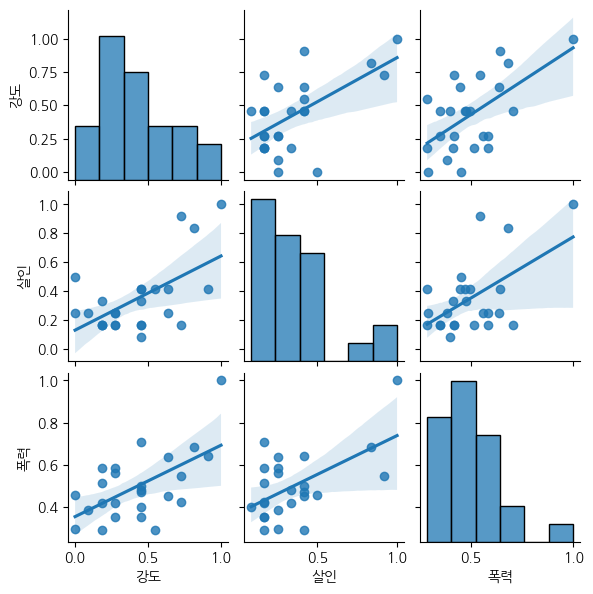

In [37]:
# pairplot으로 강도, 살인, 폭력에 대한 상관관계 시각화
import seaborn as sns

sns.pairplot(crime_gu_norm, vars=['강도','살인','폭력'], kind='reg', height=2)


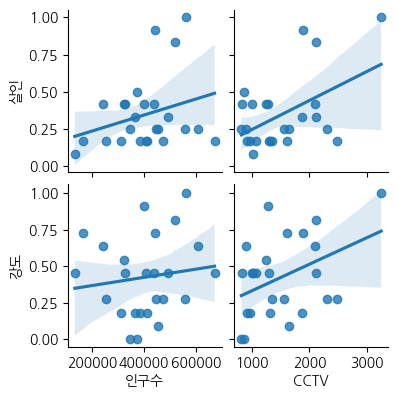

In [38]:
# 인구수, CCTV와 살인, 강도와의 관계 시각화
# 대체적으로 인구수가 많으면 강도, 살인이 많이 일어남
# 하지만, cctv수가 많을 수록 강도, 살인이 많이 일어난다? -> X
# 강도, 살인이 많이 일어나기 때문에 cctv를 많이 설치했다고 볼 수 있기도 하고, 차이가 큰 값만 없었더라면 감소하는 경향을 나타낼 수 도 있었음
sns.pairplot(
    crime_gu_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인', '강도'],
    kind='reg', height=2
)

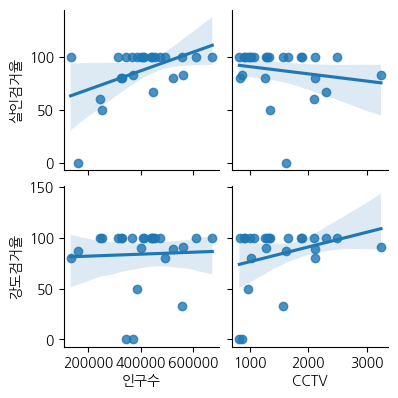

In [39]:
# 인구수, CCTV와 살인검거율, 강도검거율과의 관계 시각화
# 이 또한 마찬가지..
sns.pairplot(
    crime_gu_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '강도검거율'],
    kind='reg', height=2
)

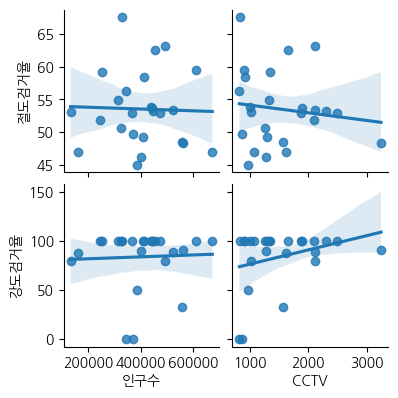

In [40]:
# 인구수, CCTV와 절도검거율, 강도검거율과의 관계 시각화
sns.pairplot(
    crime_gu_norm, x_vars=['인구수', 'CCTV'], y_vars=['절도검거율', '강도검거율'],
    kind='reg', height=2
)

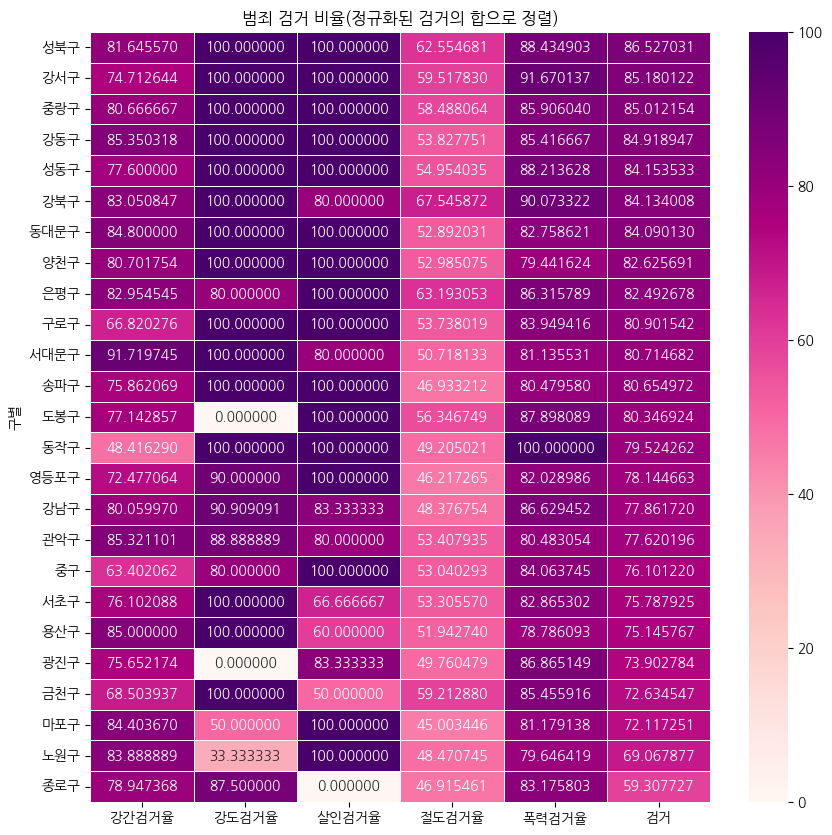

In [41]:
# 검거율만 가지고 heatmap 시각화
targat_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_gu_norm_sort[targat_col],
    annot=True, fmt='f', linewidths=0.5,
    cmap='RdPu'
)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

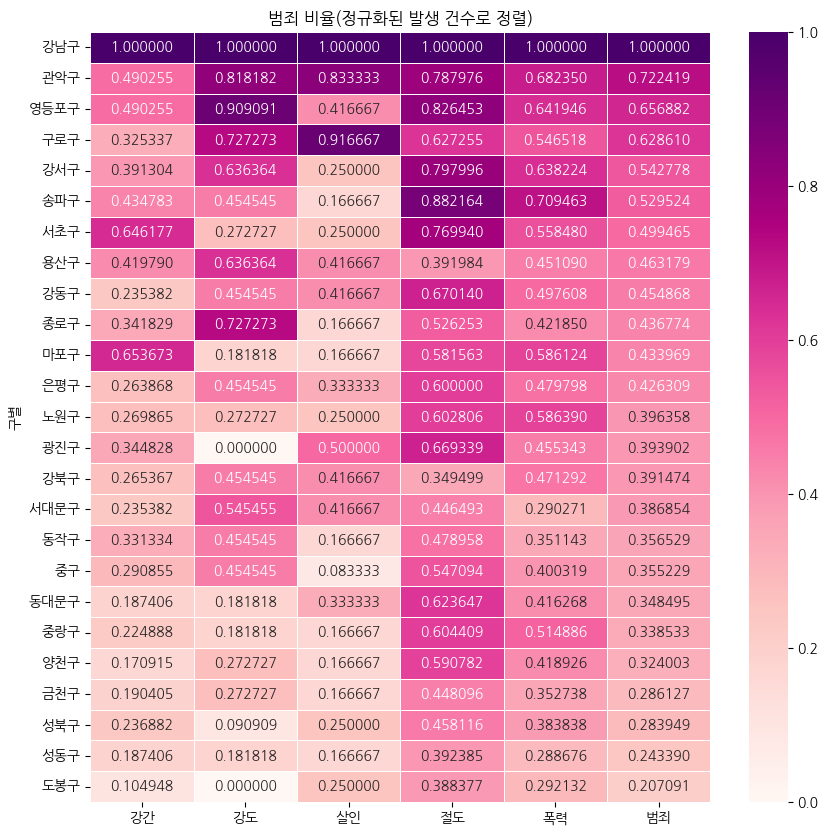

In [42]:
# 발생 건수만 가지고 heatmap 시각화
targat_col2 = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_gu_norm_sort2 = crime_gu_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_gu_norm_sort2[targat_col2],
    annot=True, fmt='f', linewidths=0.5,
    cmap='RdPu'
)
plt.title('범죄 비율(정규화된 발생 건수로 정렬)')
plt.show()

### 현재까지 결론으로 강남 3구의 발생 건수가 낮지 않고, 검거율 조차 높지 않다.
-> 인구대비 현황 등을 같이 고려해야됨

## 데이터 저장하기

In [43]:
crime_gu_norm.to_csv('crime_gu_norm.csv')

## 지도 시각화

### 서울 지도를 시각화하기 위해 GitHub에서 Json 파일을 받아야 함
https://github.com/southkorea/southkorea-maps

In [44]:
# csv파일과 json 파일 업로드
import json
import folium

crime_gu_norm_final = pd.read_csv('crime_gu_norm.csv', index_col=0, encoding='utf-8')
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [45]:
# 살인에 대한 지도 시각화
# tiles='Stamen Toner'라고 하니 오류가 떠서 그냥 기본 옵션으로 진행
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu_norm_final['살인'],
    columns=[crime_gu_norm_final.index, crime_gu_norm_final['살인']],
    fill_color='PuRd',
    key_on='feature.id',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 살인 발생 건수'
).add_to(my_map)
my_map

In [46]:
# 성범죄에 대한 지도 시각화
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu_norm_final['강간'],
    columns=[crime_gu_norm_final.index, crime_gu_norm_final['강간']],
    fill_color='PuRd',
    key_on='feature.id',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 성범죄 발생 건수'
).add_to(my_map)
my_map

In [47]:
# 5대 범죄 발생 건수에 대한 지도 시각화
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu_norm_final['범죄'],
    columns=[crime_gu_norm_final.index, crime_gu_norm_final['범죄']],
    fill_color='PuRd',
    key_on='feature.id',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 범죄 발생 건수'
).add_to(my_map)
my_map

In [64]:
# 인구 대비 범죄 발생 건수
tmp_crime = crime_gu_norm_final['범죄'] / crime_gu_norm_final['인구수']

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=tmp_crime,
    columns=[crime_gu_norm_final.index, tmp_crime],
    fill_color='PuRd',
    key_on='feature.id',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 범죄 발생 건수'
).add_to(my_map)
my_map

In [65]:
# 경찰서별 정보를 가지고 범죄발생과 함께 정리
crime_station = pd.read_csv('crime_result.csv', index_col=0, encoding='utf-8')
col3 = ['살인검거', '강도검거', '강간,추행검거', '절도검거', '폭력검거']
tmp2 = crime_station[col3] / crime_station[col3].max()
crime_station['검거'] = np.mean(tmp2, axis=1)
crime_station.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,위도,경도,검거
구분,,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958,0.772085
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822,0.590224
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305,0.530477
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280,0.716079
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349,0.839811


In [66]:
# 경찰서 위치를 지도에 표시
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for idx, rows in crime_station.iterrows():
    folium.Marker([rows['위도'], rows['경도']]).add_to(my_map)
my_map

In [67]:
# cirlemarker로 시각화
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for idx, rows in crime_station.iterrows():
    folium.CircleMarker(
        [rows['위도'], rows['경도']],
        radius=rows['검거'] * 50,
        popup=rows.index + ' : ' + '%.2f' % rows['검거'],
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(my_map)

my_map

In [68]:
# 구별 범죄 현황과 경찰서별 검거율을 함께 표시
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu_norm_final['범죄'],
    columns=[crime_gu_norm_final.index, crime_gu_norm_final['범죄']],
    fill_color='PuRd',
    key_on='feature.id',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 범죄 발생 건수'
).add_to(my_map)

for idx, rows in crime_station.iterrows():
    folium.CircleMarker(
        [rows['위도'], rows['경도']],
        radius=rows['검거'] * 50,
        popup=rows.index + ' : ' + '%.2f' % rows['검거'],
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(my_map)

my_map

### 강남의 범죄 발생이 많은 것은 혹시 유흥업소의 밀집과 관련이 있지는 않을까?

In [71]:
# 제공 받은 발생 장소별 범죄 데이터를 불러와서 분석
crime_loc = pd.read_csv('02. crime_in_Seoul_location.csv', thousands=',', encoding='euc-kr')
crime_loc.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [72]:
crime_loc['범죄명'].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [73]:
crime_loc['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [75]:
# pivot_table
crime_loc_raw = crime_loc.pivot_table(
    crime_loc, index=['장소'], columns=['범죄명'], aggfunc=[np.sum]
)
crime_loc_raw.columns = crime_loc_raw.columns.droplevel([0, 1])
crime_loc_raw

C:\Users\emddj\AppData\Local\Temp\ipykernel_13436\3148738307.py:1: FutureWarning: The provided callable <function sum at 0x000001B3A1869870> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_loc_raw = crime_loc.pivot_table(


범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579
사무실,132,8,1,682,1229
상점,95,34,1,4403,852
"숙박업소, 목욕탕",389,9,4,828,303
"아파트, 연립 다세대",284,18,12,1504,2839


In [76]:
# 데이터 정규화
crime_loc_norm = crime_loc_raw / crime_loc_raw.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [77]:
# 평균을 내서 종합이라는 컬럼에 담기
crime_loc_norm['종합'] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


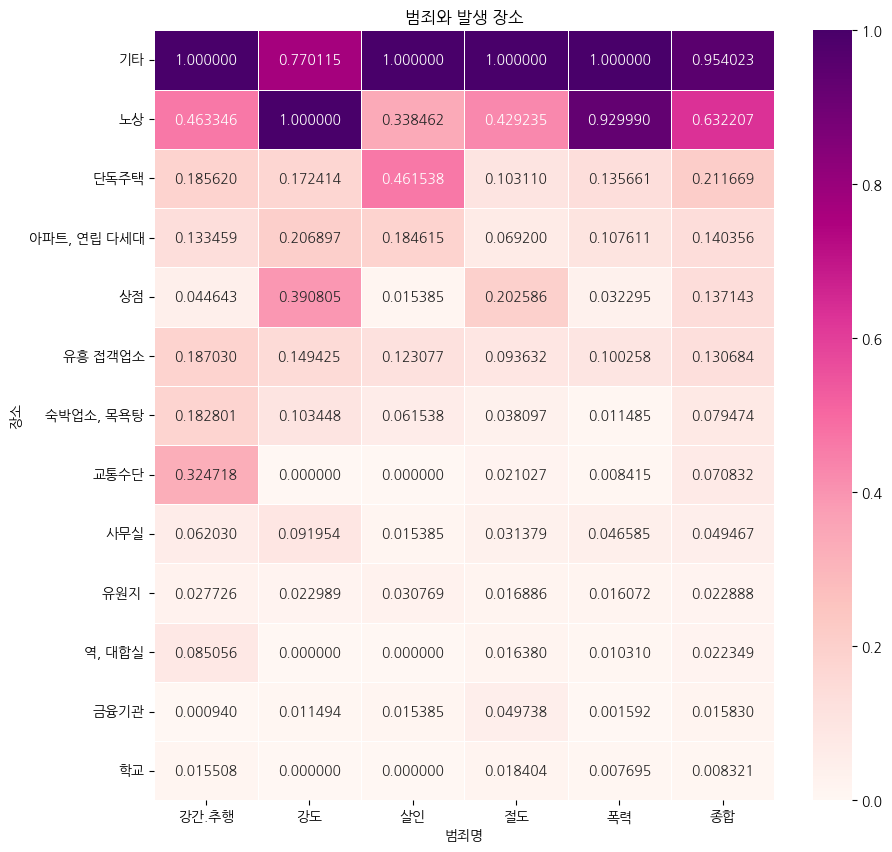

In [80]:
# 종합을 내림차순으로 정렬한 뒤 상관관계를 히트맵으로 시각화
crime_loc_norm_sort = crime_loc_norm.sort_values(by='종합', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(crime_loc_norm_sort, annot=True, fmt='f', linewidth=0.5, cmap='RdPu')
plt.title('범죄와 발생 장소')
plt.show()

### 노상이나 단독주택에서 많이 일어남
### 꼭 유흥업소가 많다고 해서 범죄가 많이 생기는 것이 아니다.